In [1]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

# Add parent directory to path to allow import of config.py
sys.path.append("..")

import config as conf

First step will be to load, parse, format and clean the raw datafiles we exported from the LMC enrollment tableau. We have two files, one where all metrics are aggregated college wide, and a second where the data is split by department. We will start with just the college wide numbers to keep things simple.

In [2]:
enrollment_by_semester = pd.read_csv(f'{conf.DATA_PATH}{conf.ENROLLMENT_BY_SEMESTER_DATAFILE}')
enrollment_by_semester

,Level 1,Level 2,Level 3,Measure Names,NegPos_Number,List of Values,Measure Values
0,2016FA,NaN,NaN,Wsch/Ftef,0 Days,All,456.131145
1,2016FA,NaN,NaN,Success Rate,0 Days,All,0.724385
2,2016FA,NaN,NaN,Sec. Count,0 Days,All,873.000000
3,2016FA,NaN,NaN,Retention Rate,0 Days,All,0.858265
4,2016FA,NaN,NaN,Number Retained,0 Days,All,19886.000000
...,...,...,...,...,...,...,...
220,2021SP,NaN,NaN,Ftef,0 Days,All,198.815000
221,2021SP,NaN,NaN,Ftes,0 Days,All,2945.490000
222,2021SP,NaN,NaN,Enrollment Capacity,0 Days,All,33062.000000
223,2021SP,NaN,NaN,Count of Migrated Data,0 Days,All,826.000000


Looks like there are some garbage columns we need to get rid of. Also, the data appears to be in R-style long format so we should reformat it to wide so we can handle it more like a canonical Pandas dataframe.

In [3]:
# Drop columns we don't need
enrollment_by_semester.drop(['Level 2', 'Level 3', 'NegPos_Number', 'List of Values'], axis=1, inplace=True)

# Reformat dataframe from wide to long
enrollment_by_semester = enrollment_by_semester.pivot_table(index='Level 1', columns='Measure Names', values='Measure Values').reset_index()

# Split 'Level 1' column string into year and semester, add back to dataframe as seperate columns
term = enrollment_by_semester['Level 1'].str.extract('(?P<year>\d{4})(?P<semester>[a-zA-Z]{2})', expand=True)
enrollment_by_semester = pd.concat([enrollment_by_semester, term], axis=1)
enrollment_by_semester.drop(['Level 1'], axis=1, inplace=True)

enrollment_by_semester

,Census Enrollment,Census Fill Rate,Count of Migrated Data,Current Enrollment,Current Fill Rate,Enrollment Capacity,Ftef,Ftes,Ftes/Ftef,Number Retained,Number Successful,Retention Rate,Sec. Count,Success Rate,Wsch/Ftef,year,semester
0,23035.0,0.659009,873.0,23035.0,0.659009,34954.0,222.960,3388.44,15.197524,19886.000000,16784.0,0.858265,873.0,0.724385,456.131145,2016,FA
1,4940.0,0.455551,212.0,4939.0,0.455459,10844.0,51.831,756.62,14.597828,4619.000000,4143.0,0.906753,212.0,0.813310,439.640370,2016,SU
2,24250.0,0.663693,917.0,24250.0,0.663693,36538.0,221.658,3453.37,15.579722,21096.708858,17768.0,0.854429,917.0,0.719673,467.801749,2017,FA
3,22573.0,0.606361,900.0,22573.0,0.606361,37227.0,220.622,3277.43,14.855409,20203.715960,17130.0,0.857980,900.0,0.727512,445.499542,2017,SP
4,4697.0,0.445171,204.0,4697.0,0.445171,10551.0,48.731,702.63,14.418543,4335.000000,3859.0,0.905578,204.0,0.806142,433.994788,2017,SU
5,25753.0,0.682108,948.0,25753.0,0.682108,37755.0,228.736,3736.85,16.336956,22022.695227,18642.0,0.847614,948.0,0.717552,526.296691,2018,FA
6,22781.0,0.607008,907.0,22790.0,0.607248,37530.0,215.558,3231.18,14.989840,20609.854932,17533.0,0.854932,907.0,0.727329,449.767580,2018,SP
7,4705.0,0.443910,206.0,4705.0,0.443910,10599.0,45.488,609.09,13.390125,4470.000000,3977.0,0.899035,206.0,0.799879,416.373549,2018,SU
8,26206.0,0.685070,965.0,26206.0,0.685070,38253.0,230.480,3796.20,16.470843,22746.407080,18812.0,0.867257,965.0,0.717577,534.423811,2019,FA
9,23752.0,0.622742,925.0,23752.0,0.622742,38141.0,220.660,3366.87,15.258180,20754.737671,17625.0,0.868835,925.0,0.737880,498.663102,2019,SP


Ok, looks good so far. Since we now have basic cleaned version of the data, lets save it before we go any farther.

In [4]:
# Save cleaned data for use in modeling and prediction
enrollment_by_semester.to_csv(f'{conf.DATA_PATH}{conf.CLEANED_DATAFILE}', index=False)

Next, let's check for correlations in the data - my hunch is that we have a bunch of variables that are highly correlated with each other. This will not help with our more advanced machine learning models.

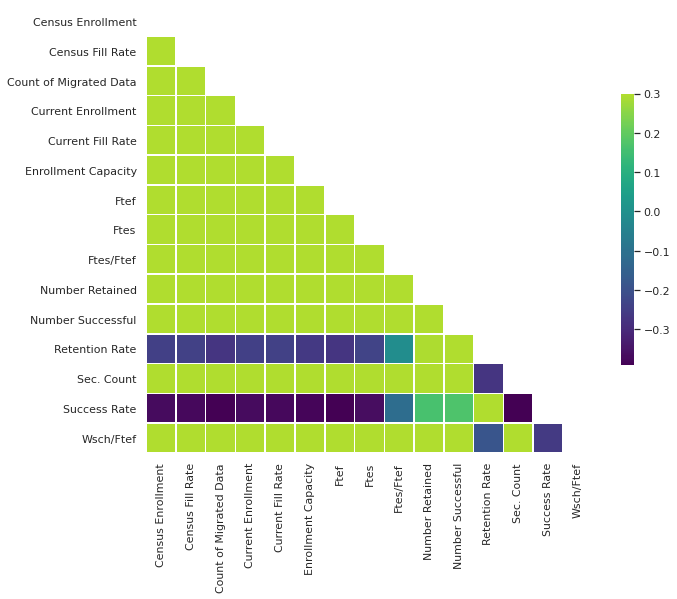

In [5]:
# Plot cross correlation matrix
correlation_matrix_all = enrollment_by_semester.corr()
mask = np.zeros_like(correlation_matrix_all, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.set(style = "white")
cmap = 'viridis'

fig, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(correlation_matrix_all, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

Sort of worrying anticorreclation between student sucess type variables enrollment. Seems to indicate that the more students we enroll the more of them don't make it.

We also have a lot of highly correlated variables - this is not great for our machine learning models. Lets leave it alone for now and see how we do.

Next step will be to format the data for modeling and prediction. The plan is to predict the enrollment of the next semester based on the data from the prior one. This means we need to duplicate and then shift the enrollment column to create a 'Enrollment Next Semester' variable. This will also necessetate dropping the current semester becasue we do not know the enrolment for next term yet!

In [6]:
# Copy enrolment and  out of dataframe
enrollment = enrollment_by_semester['Census Enrollment']

# Remove first value - this effectivly
# shifts the dataset back by a semester so that when
# we add this list back to the dataframe, each row 
# will contain the enrollment & semester value for the next semester
trimmed_enrollment = enrollment.iloc[1:]
trimmed_enrollment.reset_index(inplace=True, drop=True)
trimmed_enrollment.rename('Next Semester Census Enrollment', inplace=True)

# Drop the last row of the master data frame - this is the most recent
# semester, so we cannot use it - we don't know the enrollment for 
# the next semester yet!
enrollment_by_semester.drop(enrollment_by_semester.tail(1).index, inplace=True)
enrollment_by_semester.reset_index(inplace=True, drop=True)

In [7]:
# Add the shifted enrollment data back to our master dataframe
enrollment_by_semester = pd.concat([enrollment_by_semester, trimmed_enrollment], axis=1)
enrollment_by_semester

,Census Enrollment,Census Fill Rate,Count of Migrated Data,Current Enrollment,Current Fill Rate,Enrollment Capacity,Ftef,Ftes,Ftes/Ftef,Number Retained,Number Successful,Retention Rate,Sec. Count,Success Rate,Wsch/Ftef,year,semester,Next Semester Census Enrollment
0,23035.0,0.659009,873.0,23035.0,0.659009,34954.0,222.960,3388.44,15.197524,19886.000000,16784.0,0.858265,873.0,0.724385,456.131145,2016,FA,4940.0
1,4940.0,0.455551,212.0,4939.0,0.455459,10844.0,51.831,756.62,14.597828,4619.000000,4143.0,0.906753,212.0,0.813310,439.640370,2016,SU,24250.0
2,24250.0,0.663693,917.0,24250.0,0.663693,36538.0,221.658,3453.37,15.579722,21096.708858,17768.0,0.854429,917.0,0.719673,467.801749,2017,FA,22573.0
3,22573.0,0.606361,900.0,22573.0,0.606361,37227.0,220.622,3277.43,14.855409,20203.715960,17130.0,0.857980,900.0,0.727512,445.499542,2017,SP,4697.0
4,4697.0,0.445171,204.0,4697.0,0.445171,10551.0,48.731,702.63,14.418543,4335.000000,3859.0,0.905578,204.0,0.806142,433.994788,2017,SU,25753.0
5,25753.0,0.682108,948.0,25753.0,0.682108,37755.0,228.736,3736.85,16.336956,22022.695227,18642.0,0.847614,948.0,0.717552,526.296691,2018,FA,22781.0
6,22781.0,0.607008,907.0,22790.0,0.607248,37530.0,215.558,3231.18,14.989840,20609.854932,17533.0,0.854932,907.0,0.727329,449.767580,2018,SP,4705.0
7,4705.0,0.443910,206.0,4705.0,0.443910,10599.0,45.488,609.09,13.390125,4470.000000,3977.0,0.899035,206.0,0.799879,416.373549,2018,SU,26206.0
8,26206.0,0.685070,965.0,26206.0,0.685070,38253.0,230.480,3796.20,16.470843,22746.407080,18812.0,0.867257,965.0,0.717577,534.423811,2019,FA,23752.0
9,23752.0,0.622742,925.0,23752.0,0.622742,38141.0,220.660,3366.87,15.258180,20754.737671,17625.0,0.868835,925.0,0.737880,498.663102,2019,SP,4848.0


OK! Looking good - I think the last thing to do for now is encode the semester so the models can take advantage of it. The enrollment is summer is consistently lower than in fall or spring. The simplest solution here is good old 1-hot encoding. This misses the order and cyclical nature of spring, summer and fall semesters, but lets start there.

In [8]:
# Make onehot dataframe for semesters
semesters = pd.get_dummies(enrollment_by_semester['semester'], prefix='semester')
years = pd.get_dummies(enrollment_by_semester['year'], prefix='year')

# Add back to master dataframe and clean up old columns
enrollment_by_semester = pd.concat([enrollment_by_semester, semesters, years], axis=1)
enrollment_by_semester.drop(['semester', 'year'], axis=1, inplace=True)

enrollment_by_semester

,Census Enrollment,Census Fill Rate,Count of Migrated Data,Current Enrollment,Current Fill Rate,Enrollment Capacity,Ftef,Ftes,Ftes/Ftef,Number Retained,...,Wsch/Ftef,Next Semester Census Enrollment,semester_FA,semester_SP,semester_SU,year_2016,year_2017,year_2018,year_2019,year_2020
0,23035.0,0.659009,873.0,23035.0,0.659009,34954.0,222.960,3388.44,15.197524,19886.000000,...,456.131145,4940.0,1,0,0,1,0,0,0,0
1,4940.0,0.455551,212.0,4939.0,0.455459,10844.0,51.831,756.62,14.597828,4619.000000,...,439.640370,24250.0,0,0,1,1,0,0,0,0
2,24250.0,0.663693,917.0,24250.0,0.663693,36538.0,221.658,3453.37,15.579722,21096.708858,...,467.801749,22573.0,1,0,0,0,1,0,0,0
3,22573.0,0.606361,900.0,22573.0,0.606361,37227.0,220.622,3277.43,14.855409,20203.715960,...,445.499542,4697.0,0,1,0,0,1,0,0,0
4,4697.0,0.445171,204.0,4697.0,0.445171,10551.0,48.731,702.63,14.418543,4335.000000,...,433.994788,25753.0,0,0,1,0,1,0,0,0
5,25753.0,0.682108,948.0,25753.0,0.682108,37755.0,228.736,3736.85,16.336956,22022.695227,...,526.296691,22781.0,1,0,0,0,0,1,0,0
6,22781.0,0.607008,907.0,22790.0,0.607248,37530.0,215.558,3231.18,14.989840,20609.854932,...,449.767580,4705.0,0,1,0,0,0,1,0,0
7,4705.0,0.443910,206.0,4705.0,0.443910,10599.0,45.488,609.09,13.390125,4470.000000,...,416.373549,26206.0,0,0,1,0,0,1,0,0
8,26206.0,0.685070,965.0,26206.0,0.685070,38253.0,230.480,3796.20,16.470843,22746.407080,...,534.423811,23752.0,1,0,0,0,0,0,1,0
9,23752.0,0.622742,925.0,23752.0,0.622742,38141.0,220.660,3366.87,15.258180,20754.737671,...,498.663102,4848.0,0,1,0,0,0,0,1,0


Might be a good idea to standardize the data before fitting. But in the intrest of simplicity lets give the raw numbers a shot and see how we do.

In [9]:
# Save formatted data for use in modeling and prediction
enrollment_by_semester.to_csv(f'{conf.DATA_PATH}{conf.FORMATTED_DATAFILE}', index=False)